In [3]:
import pandas as pd

# Import the Mental Health and Social Media Balance Dataset
df = pd.read_csv('../Data/Mental_Health_and_Social_Media_Balance_Dataset 2.csv')

# Display first few rows
df.head()

,User_ID,Age,Gender,Daily_Screen_Time(hrs),Sleep_Quality(1-10),Stress_Level(1-10),Days_Without_Social_Media,Exercise_Frequency(week),Social_Media_Platform,Happiness_Index(1-10)
0,U001,44,Male,3.1,7.0,6.0,2.0,5.0,Facebook,10.0
1,U002,30,Other,5.1,7.0,8.0,5.0,3.0,LinkedIn,10.0
2,U003,23,Other,7.4,6.0,7.0,1.0,3.0,YouTube,6.0
3,U004,36,Female,5.7,7.0,8.0,1.0,1.0,TikTok,8.0
4,U005,34,Female,7.0,4.0,7.0,5.0,1.0,X (Twitter),8.0


## Dataset Shape and Basic Information

In [11]:
print("Dataset Shape:")
print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}")
print("\nColumn Names and Data Types:")
print(df.dtypes)
print("\nDataset Info:")
df.info()

Dataset Shape:
Rows: 500, Columns: 10

Column Names and Data Types:
User_ID                       object
Age                            int64
Gender                        object
Daily_Screen_Time(hrs)       float64
Sleep_Quality(1-10)          float64
Stress_Level(1-10)           float64
Days_Without_Social_Media    float64
Exercise_Frequency(week)     float64
Social_Media_Platform         object
Happiness_Index(1-10)        float64
dtype: object

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   User_ID                    500 non-null    object 
 1   Age                        500 non-null    int64  
 2   Gender                     500 non-null    object 
 3   Daily_Screen_Time(hrs)     500 non-null    float64
 4   Sleep_Quality(1-10)        500 non-null    float64
 5   Stress_Level(1-10)         500 

## Missing Values Analysis

In [12]:
missing_values = df.isnull().sum()
missing_percent = (df.isnull().sum() / len(df)) * 100

missing_df = pd.DataFrame({
    'Column': df.columns,
    'Missing Count': missing_values.values,
    'Missing Percentage': missing_percent.values
})

print("Missing Values Summary:")
print(missing_df[missing_df['Missing Count'] > 0])
if missing_df['Missing Count'].sum() == 0:
    print("No missing values found in the dataset!")

Missing Values Summary:
Empty DataFrame
Columns: [Column, Missing Count, Missing Percentage]
Index: []
No missing values found in the dataset!


## Statistical Summary

In [13]:
print("Descriptive Statistics for Numerical Columns:")
print(df.describe())

Descriptive Statistics for Numerical Columns:
              Age  Daily_Screen_Time(hrs)  Sleep_Quality(1-10)  \
count  500.000000              500.000000           500.000000   
mean    32.988000                5.530000             6.304000   
std      9.960637                1.734877             1.529792   
min     16.000000                1.000000             2.000000   
25%     24.000000                4.300000             5.000000   
50%     34.000000                5.600000             6.000000   
75%     41.000000                6.700000             7.000000   
max     49.000000               10.800000            10.000000   

       Stress_Level(1-10)  Days_Without_Social_Media  \
count          500.000000                 500.000000   
mean             6.618000                   3.134000   
std              1.542996                   1.858751   
min              2.000000                   0.000000   
25%              6.000000                   2.000000   
50%              7.0000

## Correlation Analysis

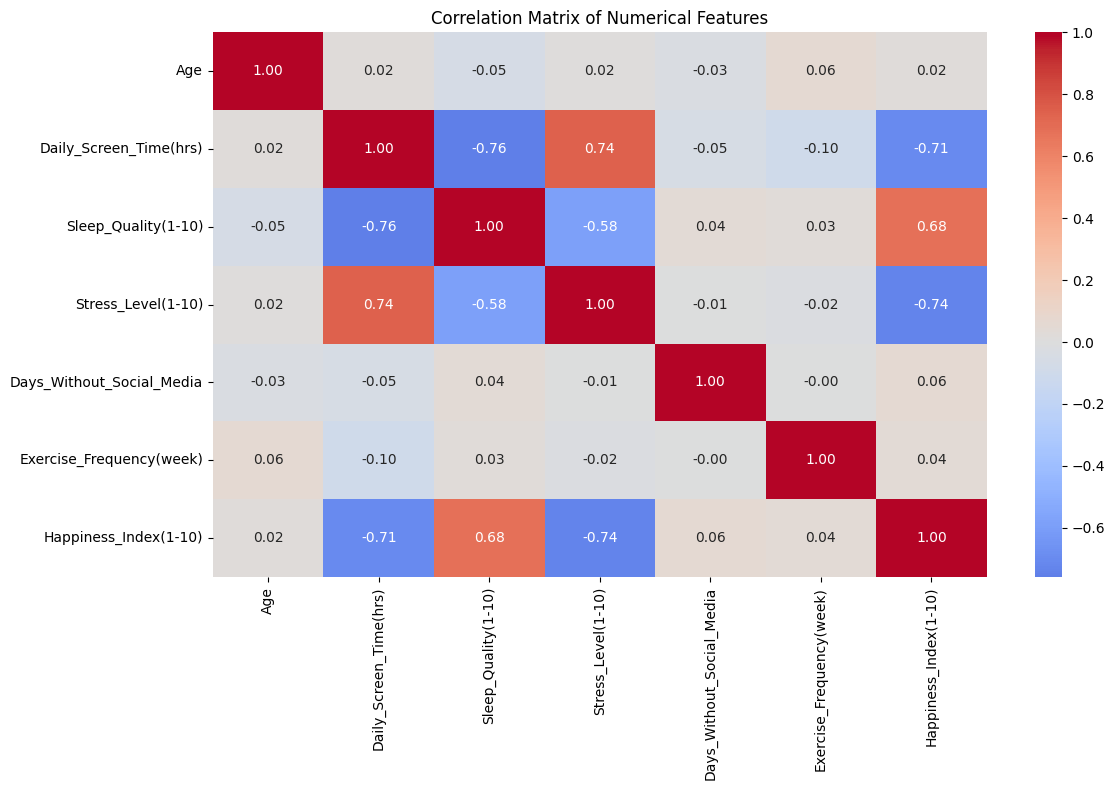

Correlation Matrix:
                                Age  Daily_Screen_Time(hrs)  \
Age                        1.000000                0.023505   
Daily_Screen_Time(hrs)     0.023505                1.000000   
Sleep_Quality(1-10)       -0.053813               -0.758910   
Stress_Level(1-10)         0.016522                0.739891   
Days_Without_Social_Media -0.025783               -0.045310   
Exercise_Frequency(week)   0.064059               -0.099023   
Happiness_Index(1-10)      0.018513               -0.705206   

                           Sleep_Quality(1-10)  Stress_Level(1-10)  \
Age                                  -0.053813            0.016522   
Daily_Screen_Time(hrs)               -0.758910            0.739891   
Sleep_Quality(1-10)                   1.000000           -0.584899   
Stress_Level(1-10)                   -0.584899            1.000000   
Days_Without_Social_Media             0.040617           -0.007970   
Exercise_Frequency(week)              0.027431         

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate correlation matrix for numerical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
correlation_matrix = df[numerical_cols].corr()

# Create correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Correlation Matrix of Numerical Features')
plt.tight_layout()
plt.show()

print("Correlation Matrix:")
print(correlation_matrix)

## Distribution of Numerical Features

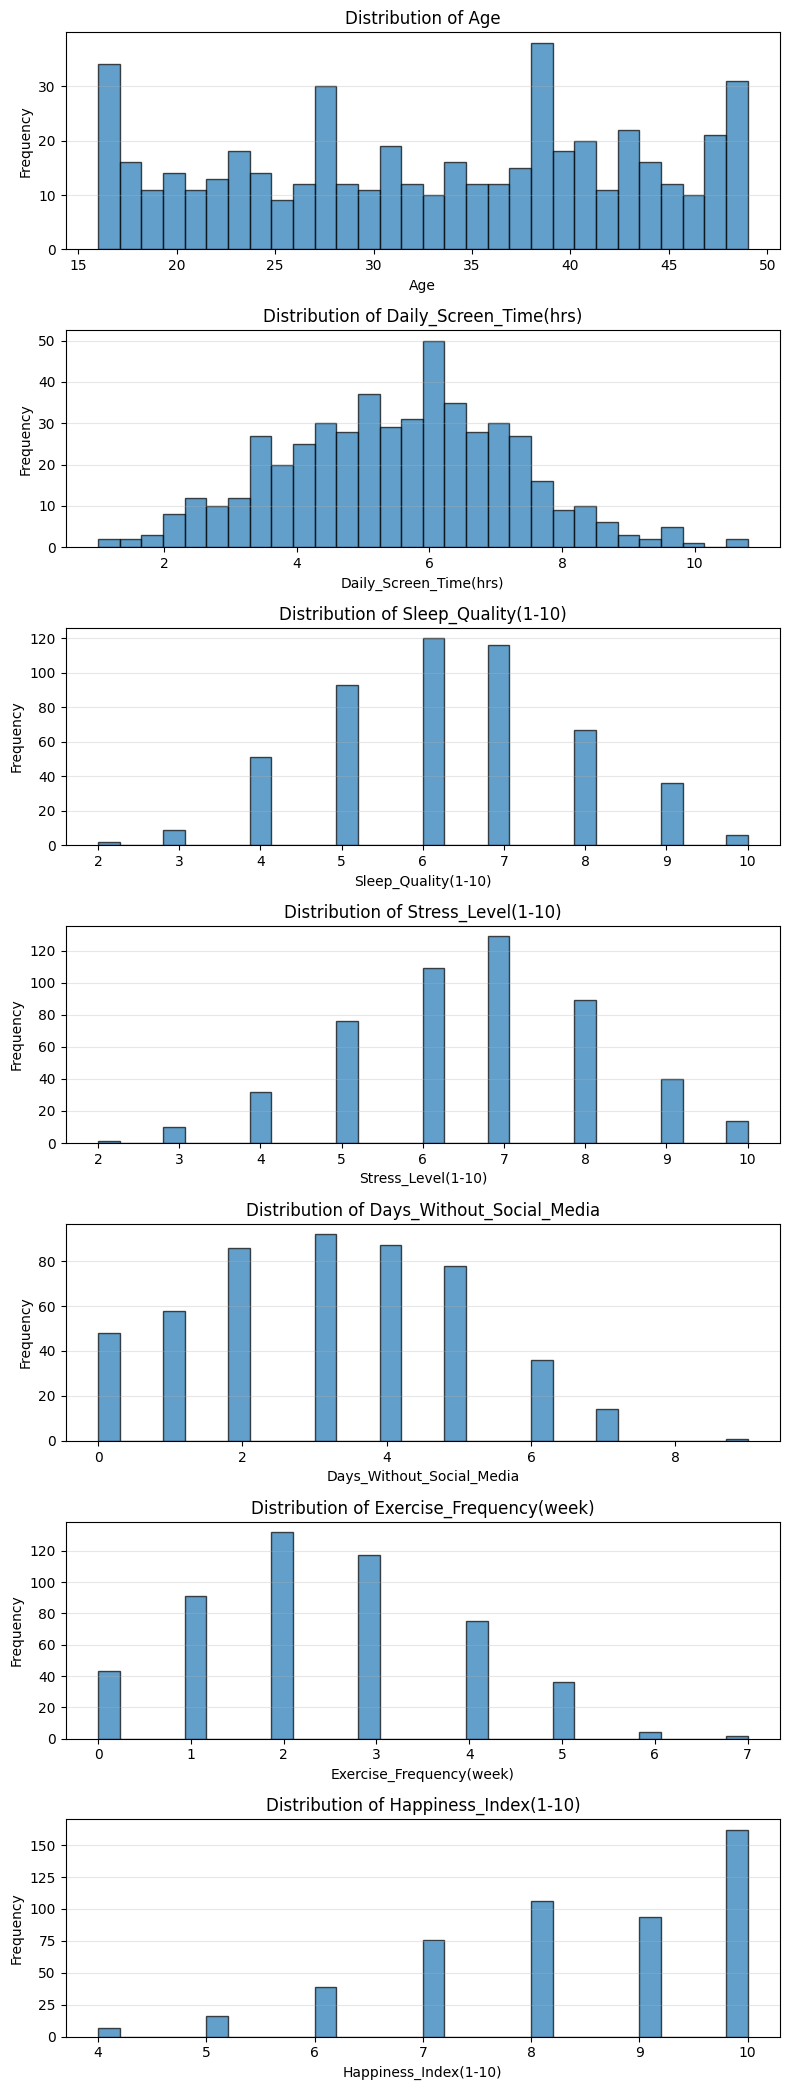

In [23]:
# Create distribution plots for numerical columns (exclude User ID)
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
# Filter out User ID column if it exists
numerical_cols = [col for col in numerical_cols if col.lower() != 'user id']
n_cols = len(numerical_cols)

if n_cols > 0:
    fig, axes = plt.subplots(n_cols, 1, figsize=(8, 3 * n_cols))
    
    # Handle single column case
    if n_cols == 1:
        axes = [axes]
    
    for idx, col in enumerate(numerical_cols):
        axes[idx].hist(df[col], bins=30, edgecolor='black', alpha=0.7)
        axes[idx].set_title(f'Distribution of {col}')
        axes[idx].set_xlabel(col)
        axes[idx].set_ylabel('Frequency')
        axes[idx].grid(axis='y', alpha=0.3)
    
    plt.tight_layout()
    plt.show()


## Box Plots for Numerical Features

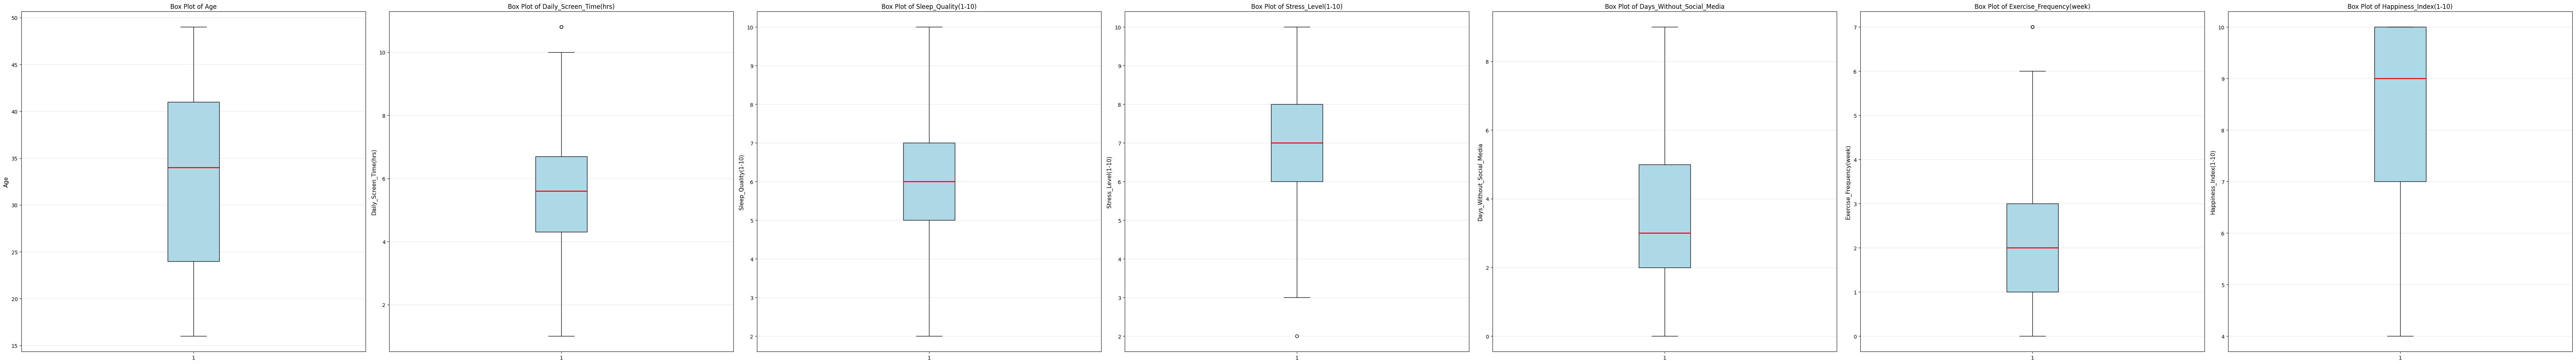

In [24]:
# Create box plots for numerical columns (exclude User ID)
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
# Filter out User ID column if it exists
numerical_cols = [col for col in numerical_cols if col.lower() != 'user id']
n_cols = len(numerical_cols)

if n_cols > 0:
    fig, axes = plt.subplots(1, n_cols, figsize=(10 * n_cols, 10))
    
    # Handle single column case
    if n_cols == 1:
        axes = [axes]
    
    for idx, col in enumerate(numerical_cols):
        axes[idx].boxplot(df[col], vert=True, patch_artist=True,
                         boxprops=dict(facecolor='lightblue'),
                         medianprops=dict(color='red', linewidth=2))
        axes[idx].set_title(f'Box Plot of {col}', fontsize=12)
        axes[idx].set_ylabel(col, fontsize=11)
        axes[idx].grid(axis='y', alpha=0.3)
    
    plt.tight_layout()
    plt.show()


## Categorical Features Distribution

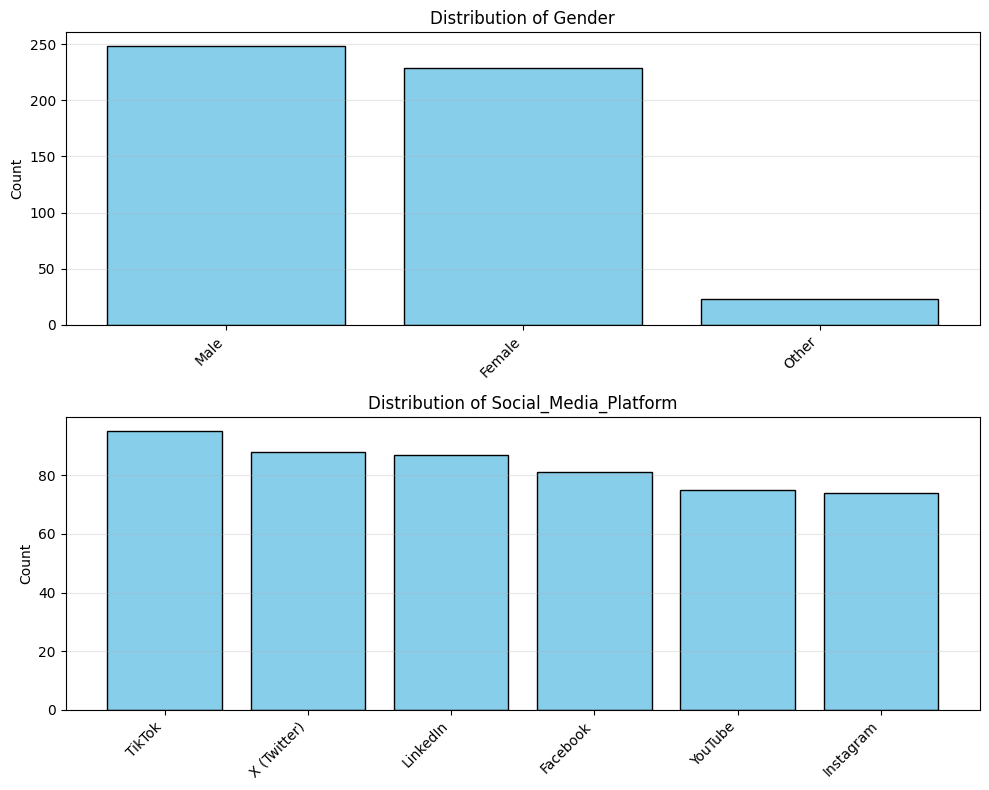

In [26]:
# Create bar plots for categorical columns (exclude User ID)
categorical_cols = df.select_dtypes(include=['object']).columns
# Filter out User ID column if it exists
categorical_cols = [col for col in categorical_cols if col.lower() != 'user_id']
n_cols = len(categorical_cols)

if n_cols > 0:
    fig, axes = plt.subplots(n_cols, 1, figsize=(10, 4 * n_cols))
    
    # Handle single column case
    if n_cols == 1:
        axes = [axes]
    
    for idx, col in enumerate(categorical_cols):
        value_counts = df[col].value_counts()
        axes[idx].bar(range(len(value_counts)), value_counts.values, color='skyblue', edgecolor='black')
        axes[idx].set_xticks(range(len(value_counts)))
        axes[idx].set_xticklabels(value_counts.index, rotation=45, ha='right')
        axes[idx].set_title(f'Distribution of {col}')
        axes[idx].set_ylabel('Count')
        axes[idx].grid(axis='y', alpha=0.3)
    
    plt.tight_layout()
    plt.show()


## Pair Plot (Scatter Matrix)

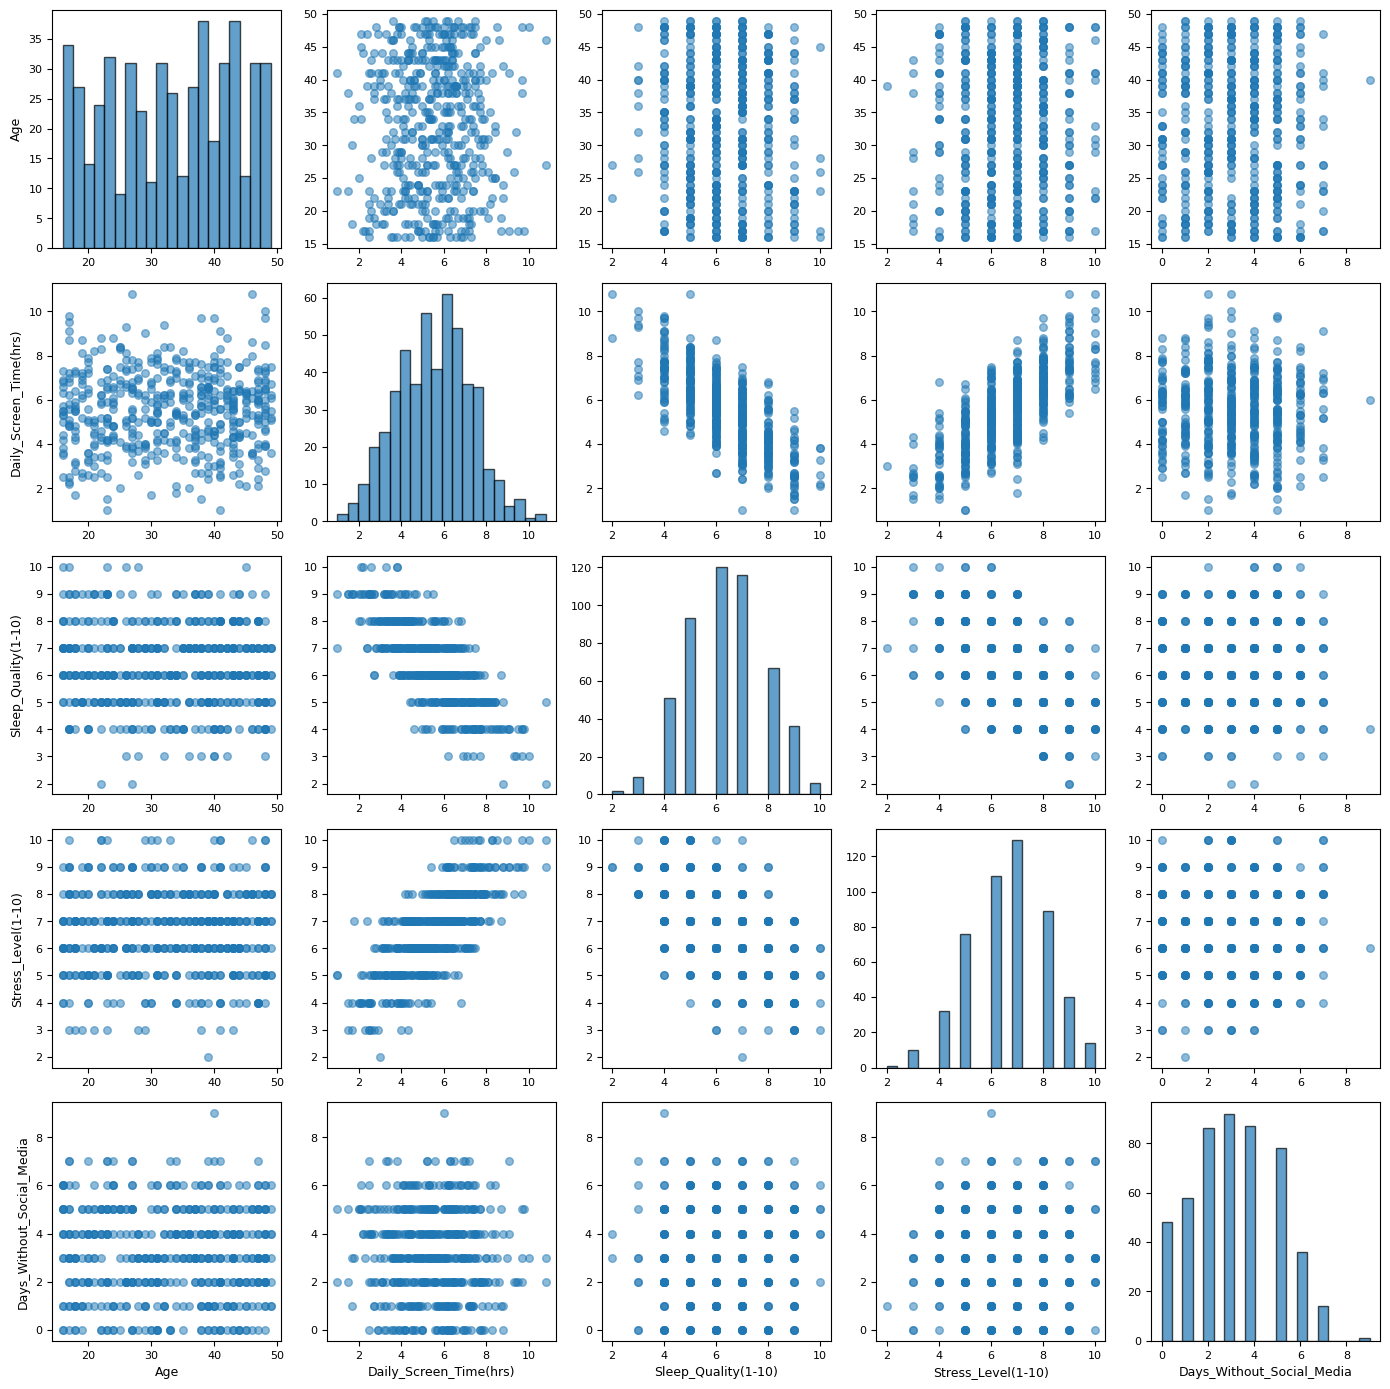

In [27]:
# Create scatter plots between numerical features (select first 5 variables, exclude User ID)
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
# Filter out User ID column if it exists
numerical_cols = [col for col in numerical_cols if col.lower() != 'user id']
# Limit to first 5 columns for readability
numerical_cols = numerical_cols[:5]

if len(numerical_cols) >= 2:
    fig, axes = plt.subplots(len(numerical_cols), len(numerical_cols), figsize=(14, 14))
    
    for i, col1 in enumerate(numerical_cols):
        for j, col2 in enumerate(numerical_cols):
            if i == j:
                # Diagonal: histogram
                axes[i, j].hist(df[col1], bins=20, edgecolor='black', alpha=0.7)
            else:
                # Off-diagonal: scatter plot
                axes[i, j].scatter(df[col2], df[col1], alpha=0.5, s=30)
            
            if j == 0:
                axes[i, j].set_ylabel(col1, fontsize=9)
            else:
                axes[i, j].set_ylabel('')
            
            if i == len(numerical_cols) - 1:
                axes[i, j].set_xlabel(col2, fontsize=9)
            else:
                axes[i, j].set_xlabel('')
            
            axes[i, j].tick_params(labelsize=8)
    
    plt.tight_layout()
    plt.show()
elif len(numerical_cols) == 1:
    print("Only one numerical column - pair plot not applicable")
else:
    print("No numerical columns found for pair plot")
